In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import scipy

In [4]:
leagues = ["betrayal", "hc_betrayal"]

In [6]:
df = pd.read_csv("data/edge_popularity.csv", index_col="edge")

In [7]:
normalized_df = (df-df.min())/(df.max()-df.min())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1175c74a8>,
      dtype=object)

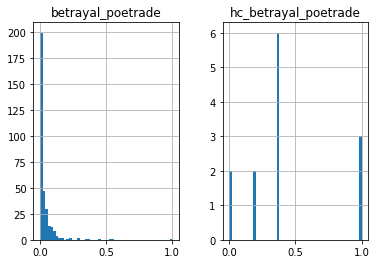

In [13]:
normalized_df.hist(bins=50)

In [14]:
normalized_df.describe()

,hc_betrayal_poetrade,betrayal_poetrade
count,13.000000,328.000000
mean,0.426573,0.037574
std,0.352841,0.085800
min,0.000000,0.000000
25%,0.181818,0.003257
50%,0.363636,0.009772
75%,0.363636,0.039414
max,1.000000,1.000000


In [15]:
most_common_edge_thresholds = normalized_df.quantile(.8)
most_common_edge_thresholds

hc_betrayal_poetrade    0.745455
betrayal_poetrade       0.048208
Name: 0.8, dtype: float64

In [16]:
normalized_df.head(30)

,hc_betrayal_poetrade,betrayal_poetrade
edge,,
Orb of Transmutation-Chaos Orb,1.000000,0.080130
Orb of Alteration-Orb of Transmutation,1.000000,0.016938
Chaos Orb-Orb of Alteration,1.000000,0.543322
Chaos Orb-Blessed Orb,0.363636,0.140717
Blessed Orb-Chaos Orb,0.363636,0.040391
Chaos Orb-Aetheric Fossil,0.363636,0.104886
Aetheric Fossil-Chaos Orb,0.363636,0.104886
Prismatic Fossil-Chaos Orb,0.363636,0.020195
Chaos Orb-Prismatic Fossil,0.363636,0.018241


In [17]:
common_profitable_edges = {}
for league in normalized_df.columns:
    edges = []
    for idx, val in enumerate(normalized_df[league]):
        if val >= most_common_edge_thresholds[league]:
            edge = normalized_df.index[idx]
            edges.append(edge)
    common_profitable_edges[league] = sorted(edges)

In [18]:
common_profitable_edges

{'hc_betrayal_poetrade': ['Chaos Orb-Orb of Alteration',
  'Orb of Alteration-Orb of Transmutation',
  'Orb of Transmutation-Chaos Orb'],
 'betrayal_poetrade': ['Aetheric Fossil-Chaos Orb',
  'Ancient Orb-Chaos Orb',
  "Apprentice Cartographer's Sextant-Chaos Orb",
  "Blessed Orb-Jeweller's Orb",
  "Cartographer's Chisel-Chaos Orb",
  'Chaos Orb-Aetheric Fossil',
  "Chaos Orb-Apprentice Cartographer's Sextant",
  'Chaos Orb-Blessed Orb',
  'Chaos Orb-Chromatic Orb',
  'Chaos Orb-Encrusted Fossil',
  'Chaos Orb-Exalted Orb',
  'Chaos Orb-Gilded Divination Scarab',
  'Chaos Orb-Jagged Fossil',
  "Chaos Orb-Jeweller's Orb",
  "Chaos Orb-Master Cartographer's Sextant",
  'Chaos Orb-Orb of Alchemy',
  'Chaos Orb-Orb of Alteration',
  'Chaos Orb-Orb of Chance',
  'Chaos Orb-Orb of Fusing',
  'Chaos Orb-Orb of Regret',
  'Chaos Orb-Orb of Scouring',
  'Chaos Orb-Potent Alchemical Resonator',
  'Chaos Orb-Potent Chaotic Resonator',
  'Chaos Orb-Regal Orb',
  'Chaos Orb-Serrated Fossil',
  'Cha

In [173]:
import json
with open('data/common_profitable_edges.json', 'w') as outfile:
    json.dump(common_profitable_edges, outfile, indent=4)